# Proyecto Zyfra

## Introducción
Zyfra es una compañia que proporciona soluciones eficientes para la industria pesada.
"Mejoramos la eficacia y la seguridad de las industrias minera, petrolera y del gas, química y de ingeniería."

##  Objetivo del proyecto
Zyfra busca un prototipo de un modelo de Machine Learning.

###  Objetivo específico
Proporcionar un modelo de Machine Learning que prediga la cantidad de oro extraido del mineral de oro.

##  Inicio

### Librerias
La compañia proporciona los datos en bruto que fueron descargados del almacén de datos

    - Se descargan las librerías necesarias para el tratamiento necesarios de los datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score  
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer 

### Revisón de datos

    Se importan los datos proporcionados

In [2]:
gold_recovery_train = pd.read_csv('/datasets/gold_recovery_train.csv')
gold_recovery_test = pd.read_csv('/datasets/gold_recovery_test.csv')
gold_recovery_full = pd.read_csv('/datasets/gold_recovery_full.csv')

Se revisan las características generales de cada uno de los archivos proporcionados

In [3]:
print(f'El dataset train tiene: \n - {gold_recovery_train.duplicated().sum()} filas duplicadas \n - Filas y columnas: {(gold_recovery_train.shape)}')
train_null = gold_recovery_train.isnull().sum().sum() / ( gold_recovery_train.shape[0] * gold_recovery_train.shape[1] )*100
print(f' - Hay un {round(train_null,2)}% de datos ausentes \n \nLas características generales son las siguientes:\n ')


display(gold_recovery_train)
print()
print(gold_recovery_train.info())
gold_recovery_train.describe()

El dataset train tiene: 
 - 0 filas duplicadas 
 - Filas y columnas: (16860, 87)
 - Hay un 2.07% de datos ausentes 
 
Las características generales son las siguientes:
 


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16855,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
16856,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
16857,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
16858,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,16788.000000,16788.000000,16490.000000,16789.000000,15339.000000,16794.000000,16677.000000,16715.000000,16794.000000,15553.000000,...,16731.000000,16747.000000,16768.000000,16767.000000,16775.000000,16775.000000,16775.000000,16776.000000,16757.000000,16775.000000
mean,4.716907,9.113559,8.301123,39.467217,67.213166,8.757048,2.360327,9.303932,2.687512,129.479789,...,19.101874,-494.164481,14.778164,-476.600082,15.779488,-500.230146,12.377241,-498.956257,18.429208,-521.801826
std,2.096718,3.389495,3.825760,13.917227,11.960446,3.634103,1.215576,4.263208,1.272757,45.386931,...,6.883163,84.803334,5.999149,89.381172,6.834703,76.983542,6.219989,82.146207,6.958294,77.170888
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.021781,-0.423260,-799.741097,0.427084,-800.258209,0.024270,-810.473526
25%,3.971262,8.825748,6.939185,42.055722,62.625685,7.610544,1.641604,7.870275,2.172953,103.064021,...,14.508299,-500.837689,10.741388,-500.269182,10.977713,-500.530594,8.925586,-500.147603,13.977626,-501.080595
50%,4.869346,10.065316,8.557228,44.498874,67.644601,9.220393,2.453690,10.021968,2.781132,131.783108,...,19.986958,-499.778379,14.943933,-499.593286,15.998340,-499.784231,11.092839,-499.933330,18.034960,-500.109898
75%,5.821176,11.054809,10.289741,45.976222,72.824595,10.971110,3.192404,11.648573,3.416936,159.539839,...,24.983961,-494.648754,20.023751,-400.137948,20.000701,-496.531781,15.979467,-498.418000,24.984992,-499.565540
max,16.001945,17.031899,18.124851,53.611374,100.000000,19.552149,6.086532,22.317730,9.789625,251.999948,...,60.000000,-127.692333,28.003828,-71.472472,63.116298,-275.073125,39.846228,-120.190931,54.876806,-39.784927


In [4]:
print(f'El dataset test tiene: \n - {gold_recovery_test.duplicated().sum()} filas duplicadas \n - Filas y columnas: {(gold_recovery_test.shape)}')
test_null = gold_recovery_test.isnull().sum().sum() / ( gold_recovery_test.shape[0] * gold_recovery_test.shape[1] )*100
print(f' - Hay un {round(test_null,2)}% de datos ausentes \n \nLas características generales son las siguientes:\n ')

display(gold_recovery_test)
print()
print(gold_recovery_test.info())
gold_recovery_test.describe()

El dataset test tiene: 
 - 0 filas duplicadas 
 - Filas y columnas: (5856, 53)
 - Hay un 0.76% de datos ausentes 
 
Las características generales son las siguientes:
 


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5851,2017-12-31 19:59:59,173.957757,15.963399,8.070000,0.896701,1401.930554,-499.728848,1401.441445,-499.193423,1399.810313,...,13.995957,-500.157454,12.069155,-499.673279,7.977259,-499.516126,5.933319,-499.965973,8.987171,-499.755909
5852,2017-12-31 20:59:59,172.910270,16.002605,8.070000,0.896519,1447.075722,-494.716823,1448.851892,-465.963026,1443.890424,...,16.749781,-496.031539,13.365371,-499.122723,9.288553,-496.892967,7.372897,-499.942956,8.986832,-499.903761
5853,2017-12-31 21:59:59,171.135718,15.993669,8.070000,1.165996,1498.836182,-501.770403,1499.572353,-495.516347,1502.749213,...,19.994130,-499.791312,15.101425,-499.936252,10.989181,-498.347898,9.020944,-500.040448,8.982038,-497.789882
5854,2017-12-31 22:59:59,179.697158,15.438979,8.070000,1.501068,1498.466243,-500.483984,1497.986986,-519.200340,1496.569047,...,19.958760,-499.958750,15.026853,-499.723143,11.011607,-499.985046,9.009783,-499.937902,9.012660,-500.154284



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_cle

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5554.000000,5572.000000,5856.000000,5690.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,...,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000
mean,170.515243,8.482873,7.264651,1.321420,1481.990241,-509.057796,1486.908670,-511.743956,1468.495216,-509.741212,...,15.636031,-516.266074,13.145702,-476.338907,12.308967,-512.208126,9.470986,-505.017827,16.678722,-512.351694
std,49.608602,3.353105,0.611526,0.693246,310.453166,61.339256,313.224286,67.139074,309.980748,62.671873,...,4.660835,62.756748,4.304086,105.549424,3.762827,58.864651,3.312471,68.785898,5.404514,69.919839
min,0.000103,0.000031,5.650000,0.000003,0.000000,-799.773788,0.000000,-800.029078,0.000000,-799.995127,...,0.000000,-799.798523,0.000000,-800.836914,-0.223393,-799.661076,0.528083,-800.220337,-0.079426,-809.859706
25%,143.340022,6.411500,6.885625,0.888769,1497.190681,-500.455211,1497.150234,-500.936639,1437.050321,-501.300441,...,12.057838,-501.054741,11.880119,-500.419113,10.123459,-500.879383,7.991208,-500.223089,13.012422,-500.833821
50%,176.103893,8.023252,7.259333,1.183362,1554.659783,-499.997402,1553.268084,-500.066588,1546.160672,-500.079537,...,17.001867,-500.160145,14.952102,-499.644328,12.062877,-500.047621,9.980774,-500.001338,16.007242,-500.041085
75%,207.240761,10.017725,7.650000,1.763797,1601.681656,-499.575313,1601.784707,-499.323361,1600.785573,-499.009545,...,18.030985,-499.441529,15.940011,-401.523664,15.017881,-499.297033,11.992176,-499.722835,21.009076,-499.395621
max,274.409626,40.024582,15.500000,5.433169,2212.432090,-57.195404,1975.147923,-142.527229,1715.053773,-150.937035,...,30.051797,-401.565212,31.269706,-6.506986,25.258848,-244.483566,14.090194,-126.463446,26.705889,-29.093593


In [5]:
print(f'El dataset full tiene: \n - {gold_recovery_full.duplicated().sum()} filas duplicadas \n - Filas y columnas: {(gold_recovery_full.shape)}')
full_null = gold_recovery_full.isnull().sum().sum() / (gold_recovery_full.shape[0] * gold_recovery_full.shape[1]) * 100
print(f' - Hay un {round(full_null,2)}% de datos ausentes \n \nLas características generales son las siguientes:\n ')    
    
display(gold_recovery_full)
print()
print(gold_recovery_full.info())
print()
gold_recovery_full.describe()

El dataset full tiene: 
 - 0 filas duplicadas 
 - Filas y columnas: (22716, 87)
 - Hay un 1.85% de datos ausentes 
 
Las características generales son las siguientes:
 


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22711,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
22712,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
22713,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
22714,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,22627.000000,22629.000000,22331.000000,22630.000000,20753.000000,22633.000000,22516.000000,22445.000000,22635.000000,21107.000000,...,22571.000000,22587.000000,22608.000000,22607.000000,22615.000000,22615.000000,22615.000000,22616.000000,22597.000000,22615.000000
mean,4.781559,9.095308,8.640317,40.001172,67.447488,8.923690,2.488252,9.523632,2.827459,140.277672,...,18.205125,-499.878977,14.356474,-476.532613,14.883276,-503.323288,11.626743,-500.521502,17.976810,-519.361465
std,2.030128,3.230797,3.785035,13.398062,11.616034,3.517917,1.189407,4.079739,1.262834,49.919004,...,6.560700,80.273964,5.655791,93.822791,6.372811,72.925589,5.757449,78.956292,6.636203,75.477151
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.836914,-0.423260,-799.741097,0.427084,-800.258209,-0.079426,-810.473526
25%,4.018525,8.750171,7.116799,42.383721,63.282393,7.684016,1.805376,8.143576,2.303108,110.177081,...,14.095940,-500.896232,10.882675,-500.309169,10.941299,-500.628697,8.037533,-500.167897,13.968418,-500.981671
50%,4.953729,9.914519,8.908792,44.653436,68.322258,9.484369,2.653001,10.212998,2.913794,141.330501,...,18.007326,-499.917108,14.947646,-499.612292,14.859117,-499.865158,10.989756,-499.951980,18.004215,-500.095463
75%,5.862593,10.929839,10.705824,46.111999,72.950836,11.084557,3.287790,11.860824,3.555077,174.049914,...,22.998194,-498.361545,17.977502,-400.224147,18.014914,-498.489381,14.001193,-499.492354,23.009704,-499.526388
max,16.001945,17.031899,19.615720,53.611374,100.000000,19.552149,6.086532,22.861749,9.789625,274.409626,...,60.000000,-127.692333,31.269706,-6.506986,63.116298,-244.483566,39.846228,-120.190931,54.876806,-29.093593


### Descripción de datos

Los datos representados en los dataset son los siguientes:

Proceso tecnológico

    •	Rougher feed — materia prima
    •	Rougher additions (o adiciones de reactivos) - reactivos de flotación: xantato, sulfato, depresante
        o	Xantato — promotor o activador de la flotación
        o	Sulfato — sulfuro de sodio para este proceso en particular
        o	Depresante — silicato de sodio
    •	Rougher process — flotación
    •	Rougher tails — residuos del producto
    •	Float banks — instalación de flotación
    •	Cleaner process — purificación
    •	Rougher Au — concentrado de oro rougher
    •	Final Au — concentrado de oro final

Parámetros de las etapas

    •	air amount — volumen de aire
    •	fluid levels
    •	feed size — tamaño de las partículas de la alimentación
    •	feed rate


A CONSIDERAR:

La columna __"date"__ representa la __fecha y hora__ de adquisición de los datos.

El resto de las columnas tiene un nombre acorde al siguiente formato: [stage].[parameter_type].[parameter_name]

DONDE...

    - Valores posibles para [stage]:
        •	rougher — flotación
        •	primary_cleaner — purificación primaria
        •	secondary_cleaner — purificación secundaria
        •	final — características finales

    - Valores posibles para [parameter_type]:
        •	input — parámetros de la materia prima
        •	output — parámetros del producto
        •	state — parámetros que caracterizan el estado actual de la etapa 
        •	calculation — características de cálculo (Involucra características derivadas o calculadas en lugar de medidas directas)


### Escrutineo de datos

Algunos parámetros no están disponibles porque fueron medidos o calculados mucho más tarde. Eso podría llevar a que algunas de las características que están presentes en el conjunto de entrenamiento pueden estar ausentes en el de prueba.

Los parámetros cercanos en el tiempo indicado en date suelen ser similares.

El dataset fuente contiene los conjuntos de entrenamiento y prueba con todas las características.

Los datos de los datasets se resumen de la siguiente forma:

 Data | gold_recovery_train | gold_recovery_test | gold_recovery_full
--- | --- | --- | ---
Filas duplicadas | 0 | 0 | 0
% datos ausentes | 2.07% | 0.76% | 1.85%
Filas | 16860 | 5856 | 22716
Columnas | 87 | 53 | 87
D. float64 | 86 | 52 | 86
D. object | 1 | 1 | 1


Esta es la visualización general inicial de los datos

### Recuperación del concentrado rougher

Se comprueba que el calculo de la recuperación de la característica __rougher.output.recovery__ es correcta, esto mediante el conjunto de entrenamiento. La fórmula es la siguiente:

$Recuperación = \frac{C \cdot (F - T)}{F \cdot (C - T)} \times 100\%$

Donde:

Recuperación del concentrado rougher (C):

    - Después de la flotación: rougher.output.concentrate_au
    - Después de la purificación: final.output.concentrate_ag 


Proporción de oro en la alimentación (F):

    - Antes de la flotación: rougher.input.feed_au
    - En el concentrado justo después de la flotación: rougher.output.concentrate_au


Proporción de oro en las colas rougher (T):

    - Después de la flotación: rougher.output.tail_au
    - Después de la purificación: final.output.tail_au
    

Para trabajar con los datos, se decide eliminar las filas con datos nulos y posteriormente realizar la función

In [6]:
gold_recovery_train_clean = gold_recovery_train.dropna()

In [7]:
def recovery_calc(row):
    numerator = row['rougher.output.concentrate_au']*(row['rougher.input.feed_au']-row['rougher.output.tail_au'])
    denominator = row['rougher.input.feed_au']*(row['rougher.output.concentrate_au']-row['rougher.output.tail_au'])
    recovery_rougher =  numerator/denominator*100

    return recovery_rougher


gold_recovery_train_clean['recovery_rougher'] = gold_recovery_train_clean.apply(lambda x: recovery_calc(x), axis = 1)
gold_recovery_train_clean.head()

/tmp/ipykernel_44/4234650185.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gold_recovery_train_clean['recovery_rougher'] = gold_recovery_train_clean.apply(lambda x: recovery_calc(x), axis = 1)


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,recovery_rougher
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,87.107763
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184,86.843261
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363,86.842308
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129,87.226430
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691,86.688794


Se calcula el EAM

In [8]:
eam = (gold_recovery_train_clean['recovery_rougher'] - gold_recovery_train_clean['rougher.output.recovery']).abs().mean()
print(eam)

9.460144184559453e-15


El valor del Error Absoluto Medio es muy cercano a cero, un EAM tan pequeño sugiere que las predicciones del modelo son casi idénticas a los valores reales.

### Carácteristicas no disponibles

Se procede a revisar los valores ausentes de los diferentes parámetros del dataset.

In [9]:
gold_recovery_full_columns_names = gold_recovery_full.columns.tolist()
gold_recovery_test_columns_names = gold_recovery_test.columns.tolist()

missing_columns = list(set(gold_recovery_full_columns_names) - set(gold_recovery_test_columns_names))

print(f'Número de columnas faltantes en el dataset de prueba: {len(missing_columns)} columnas')
print(f'\nNombres de las columnas ausentes:')
sorted(missing_columns)

Número de columnas faltantes en el dataset de prueba: 34 columnas

Nombres de las columnas ausentes:


['final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

Se observa que son 34 las columnas faltantes en el dataset de prueba.

Los nombres de las columnas no disponibles en el conjunto de prueba son de tipo float y corresponden tanto a outputs como a calculos.

Se menciona la precencia de diferentes elementos como "au" (oro), "pb" (plomo), "ag" (plata) en diferentes estapas del procesamiento, así como sustancias "sulfate" y "sol".

### Preprocesamiento de datos

Se comienza el preprocesamiento de los datos.

Recordando las caracteristicas de los datos, tenemos unicamente una columna tipo objetc, que es la de la fecha, el resto de las columnas son tipo float.

 Data | gold_recovery_train | gold_recovery_test | gold_recovery_full
--- | --- | --- | ---
Filas duplicadas | 0 | 0 | 0
% datos ausentes | 2.07% | 0.76% | 1.85%
Filas | 16860 | 5856 | 22716
Columnas | 87 | 53 | 87
D. float64 | 86 | 52 | 86
D. object | 1 | 1 | 1

Debido a que no requeriremos hacer ningún tipo de cálculo con la columna de fechas se procede a borrarla.
Se sabe que los parámetros cercanos en el tiempo suelen ser similares, por lo que procede a rellenar los datos ausentes con el datos inmediato anterior.

In [10]:
gold_recovery_test = gold_recovery_test.drop(['date'], axis=1)
gold_recovery_train = gold_recovery_train.drop(['date'], axis=1)

print(gold_recovery_test.shape)
print(gold_recovery_train.shape)

(5856, 52)
(16860, 86)


In [11]:
gold_recovery_train = gold_recovery_train.fillna(method='ffill',axis=0)
gold_recovery_test = gold_recovery_test.fillna(method='ffill',axis=0)

print(f'Los datos nulos en el dataset de entranmiento es de: {gold_recovery_train.isnull().sum().sum()} datos nulos')
print(f'Los datos nulos en el dataset de prueba es de: {gold_recovery_test.isnull().sum().sum()} datos nulos')

Los datos nulos en el dataset de entranmiento es de: 0 datos nulos
Los datos nulos en el dataset de prueba es de: 0 datos nulos


Con esto se concluye el preprocesamiento de datos.

## Análisis de datos

En el siguiente histograma, se muestra cómo cambia la concentración de metales (Au, Ag, Pb) en función de la etapa de purificación.

### Oro

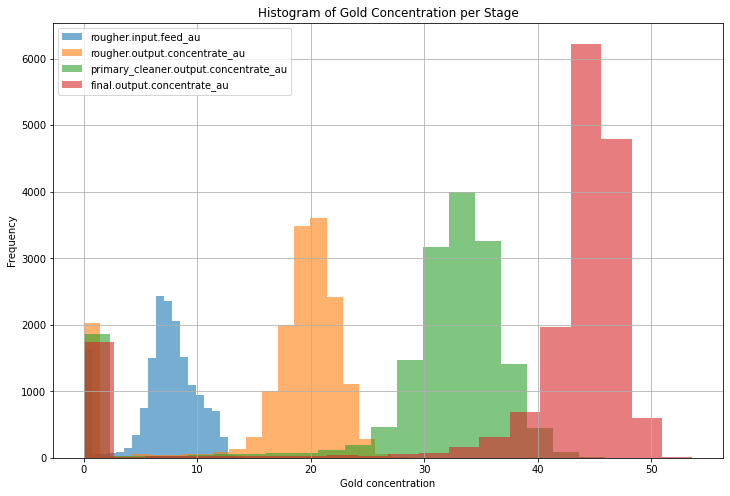

In [12]:
data_au = gold_recovery_train[['rougher.input.feed_au', 'rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au']]

fig, ax = plt.subplots(figsize=(12, 8))

for column in data_au.columns:
    ax.hist(data_au[column], bins=20, alpha=0.6, label=column, histtype="stepfilled")

plt.title('Histogram of Gold Concentration per Stage')
plt.xlabel('Gold concentration')
plt.ylabel('Frequency')
plt.legend(loc='upper left')
plt.grid(True)

plt.show()

Acorde a lo demostrado, la concentración de __oro__ va incrementandose conforme se avanza en el proceso de purificación.

### Plata

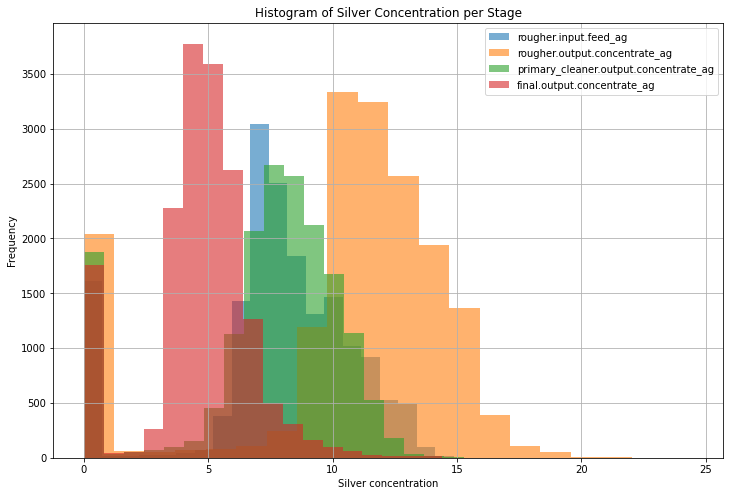

In [13]:
data_ag = gold_recovery_train[['rougher.input.feed_ag', 'rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag']]

fig, ax = plt.subplots(figsize=(12, 8))

for column in data_ag.columns:
    ax.hist(data_ag[column], bins=20, alpha=0.6, label=column, histtype="stepfilled")

plt.title('Histogram of Silver Concentration per Stage')
plt.xlabel('Silver concentration')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.grid(True)

plt.show()

La concentración de __Plata__ es mayor va en decrimento conforme se avanza en el proceso de purificación.

### Plomo

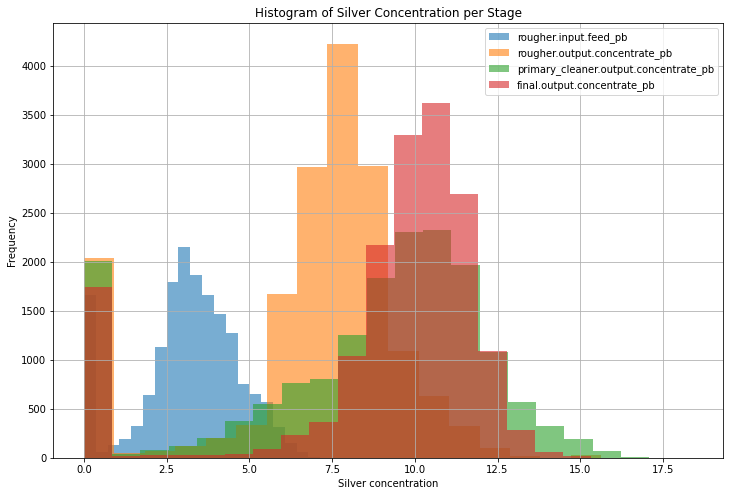

In [14]:
data_pb = gold_recovery_train[['rougher.input.feed_pb', 'rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb']]

fig, ax = plt.subplots(figsize=(12, 8))

for column in data_pb.columns:
    ax.hist(data_pb[column], bins=20, alpha=0.6, label=column, histtype="stepfilled")

plt.title('Histogram of Silver Concentration per Stage')
plt.xlabel('Silver concentration')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.grid(True)

plt.show()

La concentración de __Plomo__ aumenta tras la salida del primer proceso. Posteriormente aumente muy poco con respecto a lo proceso anterior.

### Distribuciones del tamaño de las partículas de la alimentación

Se comparan las distribuciones del tamaño de las partículas de la alimentación en el conjunto de entrenamiento y en el conjunto de prueba, pues si se tuvieran variaciones la evaluación del modelo no será correcta.

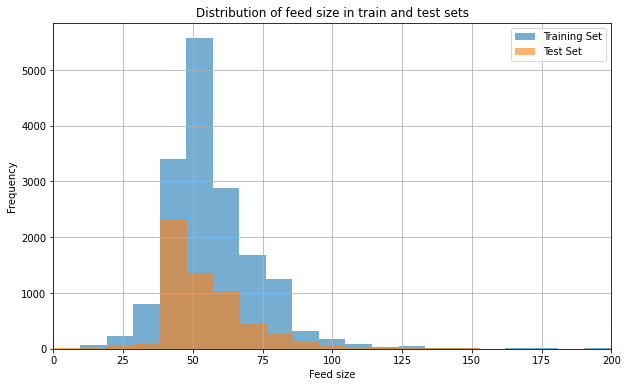

In [15]:
plt.figure(figsize=(10, 6))

gold_recovery_train['rougher.input.feed_size'].hist(alpha=0.6, label='Training Set', bins=50)
gold_recovery_test['rougher.input.feed_size'].hist(alpha=0.6, label='Test Set', bins=50)

plt.title('Distribution of feed size in train and test sets')
plt.xlabel('Feed size')
plt.ylabel('Frequency')
plt.legend()

plt.xlim(0, 200)

plt.show()

In [16]:
train_mean = gold_recovery_train['rougher.input.feed_size'].mean()
test_mean = gold_recovery_test['rougher.input.feed_size'].mean()

print(f'Media de rougher.input.feed_size: \n - Conjunto de entrenamiento: {train_mean:.2f} \n - Conjunto de prueba: {test_mean:.2f}')

train_median = gold_recovery_train['rougher.input.feed_size'].median()
test_median = gold_recovery_test['rougher.input.feed_size'].median()

print(f'\nMediana de rougher.input.feed_size: \n - Conjunto de entrenamiento: {train_median:.2f} \n - Conjunto de prueba: {test_median:.2f}')

train_std = gold_recovery_train['rougher.input.feed_size'].std()
test_std = gold_recovery_test['rougher.input.feed_size'].std()

print(f'\nDesviación estándar de rougher.input.feed_size: \n - Conjunto de entrenamiento: {train_std:.2f} \n - Conjunto de prueba: {test_std:.2f}')


Media de rougher.input.feed_size: 
 - Conjunto de entrenamiento: 60.19 
 - Conjunto de prueba: 55.90

Mediana de rougher.input.feed_size: 
 - Conjunto de entrenamiento: 54.07 
 - Conjunto de prueba: 49.96

Desviación estándar de rougher.input.feed_size: 
 - Conjunto de entrenamiento: 30.52 
 - Conjunto de prueba: 22.71


Las partículas de la alimentación en el conjunto de entrenamiento y en el conjunto de prueba no varían considerablemente, por lo cual los datos sirven para evaluar el modelo correctamente.

### Concentración total de substancias

Se revisan las concentraciones totales de todas las sustancias en las diferentes etapas: 
    
    - materia prima
    - concentrado rougher
    - concentrado final 
    
Con el fin de visualizar si la distribución es normal o anormal para considerar conservar o eliminar esos valores.

In [17]:
rougher_input = ['rougher.input.feed_ag','rougher.input.feed_pb','rougher.input.feed_sol','rougher.input.feed_au']   
rougher_output = ['rougher.output.concentrate_ag','rougher.output.concentrate_pb','rougher.output.concentrate_sol','rougher.output.concentrate_au']  
final_output = ['final.output.concentrate_ag','final.output.concentrate_pb','final.output.concentrate_sol','final.output.concentrate_au']

rougher_input_sum = gold_recovery_train.loc[:, rougher_input].sum(axis=1)
rougher_output_sum = gold_recovery_train.loc[:, rougher_output].sum(axis=1)
final_output_sum = gold_recovery_train.loc[:, final_output].sum(axis=1)

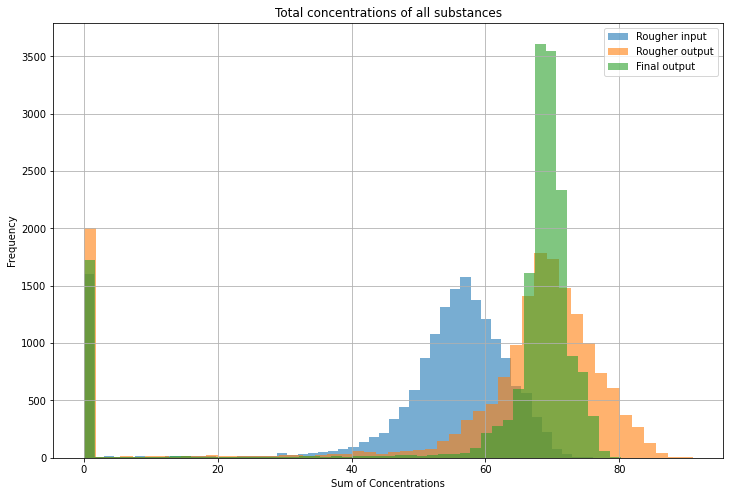

In [18]:
plt.figure(figsize=(12, 8))

plt.hist(rougher_input_sum, bins=50, alpha=0.6, label='Rougher input')
plt.hist(rougher_output_sum, bins=50, alpha=0.6, label='Rougher output')
plt.hist(final_output_sum, bins=50, alpha=0.6, label='Final output')

plt.title('Total concentrations of all substances')
plt.xlabel('Sum of Concentrations')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)

plt.show()

En el histograma se observan valores en 0, estos valores no tendrían porqué existir, dado que siempre hay una entrada de alguna substancia, no debería dar 0. Se procede a filtrar las filas con datos > que 0 para el dataset de entrenamiento.

In [19]:
condition = (
    (gold_recovery_train[rougher_input].sum(axis=1) > 0) &
    (gold_recovery_train[rougher_output].sum(axis=1) > 0) &
    (gold_recovery_train[final_output].sum(axis=1) > 0)
)

gold_recovery_train = gold_recovery_train[condition]
gold_recovery_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15128 entries, 0 to 16859
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         15128 non-null  float64
 1   final.output.concentrate_pb                         15128 non-null  float64
 2   final.output.concentrate_sol                        15128 non-null  float64
 3   final.output.concentrate_au                         15128 non-null  float64
 4   final.output.recovery                               15128 non-null  float64
 5   final.output.tail_ag                                15128 non-null  float64
 6   final.output.tail_pb                                15128 non-null  float64
 7   final.output.tail_sol                               15128 non-null  float64
 8   final.output.tail_au                                15128 non-null  float64


## Contrucción de Modelo de Machine Learning

### Datos

Para entrenar al modelo se toman en cuenta para los "features" las columnas del conjunto de prueba.

Para el apartado de "target" se toman en cuenta las columnas objetivo 'rougher.output.recovery' y 'final.output.recovery' del mismo conjunto de entrenamiento.

In [20]:
features = gold_recovery_test.columns.values
features

array(['primary_cleaner.input.sulfate',
       'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size',
       'primary_cleaner.input.xanthate',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level',
       'rougher.input.feed_ag', 'rougher.input.feed_pb',
       'rougher.input.feed_rate', 'rougher.input.feed_size',
       'rougher.input.feed_sol', 'rougher.input.feed_au',
       'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate',
       'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_le

In [21]:
targets = ['rougher.output.recovery', 'final.output.recovery']
X_train = gold_recovery_train[features].reset_index(drop = True)
y_train = gold_recovery_train[targets].reset_index(drop = True)
y_train.columns = [0,1]
y_train

,0,1
0,87.107763,70.541216
1,86.843261,69.266198
2,86.842308,68.116445
3,87.226430,68.347543
4,86.688794,66.927016
...,...,...
15123,89.574376,73.755150
15124,87.724007,69.049291
15125,88.890579,67.002189
15126,89.858126,65.523246


In [22]:
X_train

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,125.629232,10.296251,7.25,1.002663,1576.166671,-500.904965,1575.950626,-499.865889,1575.994189,-499.315107,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,123.819808,11.316280,7.25,0.991265,1601.556163,-499.997791,1600.386685,-500.607762,1602.003542,-500.870069,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,122.270188,11.322140,7.25,0.996739,1599.968720,-500.951778,1600.659236,-499.677094,1600.304144,-500.727997,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,117.988169,11.913613,7.25,1.009869,1601.339707,-498.975456,1601.437854,-500.323246,1599.581894,-500.888152,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15123,123.381787,8.028927,6.50,1.304232,1648.421193,-400.382169,1648.742005,-400.359661,1648.578230,-399.363624,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
15124,120.878188,7.962636,6.50,1.302419,1649.820162,-399.930973,1649.357538,-399.721222,1648.656192,-401.195834,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
15125,105.666118,7.955111,6.50,1.315926,1649.166761,-399.888631,1649.196904,-399.677571,1647.896999,-399.988275,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
15126,98.880538,7.984164,6.50,1.241969,1646.547763,-398.977083,1648.212240,-400.383265,1648.917387,-399.521344,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


### Valor sMAPE

Ya con "features" y "target" definido, se procede a realizar la función 'compute_smape' que calcula la métrica de sMAPE (Symmetric Mean Absolute Percentage Erro o Error medio absoluto porcentual simétrico) cuya fórmula es:

$sMAPE = \frac{1}{n} \sum_{t=1}^{n} \frac{|y_t - \hat{y}_t|}{(|y_t| + |\hat{y}_t|)/2} \times 100\%$

Y posterior a eso, se usará la función 'smape_ponderado' para calcular con dos conjuntos de datos que están divididos en dos etapas, "rougher" y "final".

In [23]:
def compute_smape(y, y_pred):
    n = len(y)
    real = abs(y)
    pred = abs(y_pred)
    diff = abs(y - y_pred)
    smape =  (1/n)*np.sum(diff /((real + pred)/2))*100
    return smape

def smape_ponderado(y, y_pred):
    
    y_rougher = y.iloc[:,0]
    y_pred_rougher = y_pred[:,0]
    
    y_final = y.iloc[:,1]
    y_pred_final = y_pred[:,1]
    
    smape_rougher = compute_smape(y_rougher, y_pred_rougher)
    smape_final = compute_smape(y_final, y_pred_final)
    
    return (0.25*smape_rougher + 0.75*smape_final)

In [24]:
smape_scorer = make_scorer(smape_ponderado, greater_is_better=False)

### Bosque Aleatorio

Se entrena un modelo de bosque aleatorio con validación cruzada

In [26]:
best_result = 1000
best_depth = 0
best_model = None

for depth in range(1, 10):
    model = RandomForestRegressor(n_estimators=20, random_state=12345, max_depth=depth)
    model_scores = cross_val_score(model, X_train, y_train, scoring=smape_scorer, cv=5)
    
    model_scores_abs = np.abs(model_scores)
    mean_score = np.mean(model_scores_abs)
    
    print('Max depth =', depth, '-- sMAPE score:', model_scores)
    
    if mean_score < best_result:
        best_model = model
        best_result = mean_score
        best_depth = depth

print('\nBest max depth =', best_depth, '-- sMAPE score:', best_result)

Max depth = 1 -- sMAPE score: [-11.46835976  -9.13782912  -9.6218076  -10.90142443 -13.28209874]
Max depth = 2 -- sMAPE score: [-10.58565284  -9.64889027  -9.37707741  -9.61900121 -12.27224797]
Max depth = 3 -- sMAPE score: [-10.52548982  -8.85815571 -10.09730135  -9.33206217 -13.77906257]
Max depth = 4 -- sMAPE score: [-10.56690823  -8.6376797   -9.85972089  -9.067494   -13.0578425 ]
Max depth = 5 -- sMAPE score: [-10.32230791  -8.23046973  -9.38813274  -9.07699621 -13.09334824]
Max depth = 6 -- sMAPE score: [-10.60410452  -9.70301168  -9.27787517 -10.68753051 -14.02460597]
Max depth = 7 -- sMAPE score: [-10.90983191 -10.64492     -9.35556292 -11.06019167 -14.88606511]
Max depth = 8 -- sMAPE score: [-10.8499649  -10.74439767  -9.5035632  -11.19928632 -14.52984097]
Max depth = 9 -- sMAPE score: [-11.20035024 -10.95650596  -9.49171481 -11.62780576 -14.57262629]

Best max depth = 5 -- sMAPE score: 10.022250964609563


### Regresión Lineal

Se entrena un modelo de regresión lineal con validación cruzada

In [27]:
lr_model = LinearRegression()
lr_scores = cross_val_score(lr_model, X_train, y_train, scoring=smape_scorer, cv=5)

lr_scores_abs = np.abs(lr_scores)
lr_final_score = np.mean(lr_scores_abs)

print('Puntajes sMAPE para cada iteración:', lr_scores)
print('Modelo de Regresión Lineal | sMAPE = {:.6f}'.format(lr_final_score))

Puntajes sMAPE para cada iteración: [-12.70089263 -10.33622199  -9.52385404 -11.25693471 -16.74003831]
Modelo de Regresión Lineal | sMAPE = 12.111588


## Conclusión

Zyfra nos proporciona los datos en bruto que fueron descargados del almacén de datos:

    - gold_recovery_train
    - gold_recovery_test
    - gold_recovery_full

Se hace el escrutinio de los datos, donde no se encuentran filas duplicadas, pero sí un porcentaje de valores ausentes.

Se verifica que el valor del Error Absoluto Medio fuera cercano a cero para verificar que las predicciones del modelo son casi idénticas a los valores reales.

Se verifican cuales son las columnas que hacen falta en el dataset de test, para identificar que en su mayoria son columnas de procesos de salida. 

Para los datos ausentes, se utiliza un rellenado de datos con los datos inmediatos siguientes, debido a que se conoce que los datos obtenidos en horarios cercanos suelen ser muy parecidas.

A travez de histogramas se muestra cómo cambia la concentración de metales (Au, Ag, Pb) en función de la etapa de purificación y tambien se muestra la concentracion total de todas las sustancias en las diferentes etapas, donde se observan valores en 0, que se deciden eliminar las filas con datos menores que 0, por ser valores atípicos.

Para el modelo de Machine Learning, se calcula el sMAPE (error medio absoluto porcentual simétrico), y se utiliza tanto Bosque Aleatorio y Regresión Lineal con validación cruzada.

Finalmente el modelo de Bosque Aleatorio con profundidad 5 proporciona el mejor valor de sMAPE que fue de 10.0223, lo que indica que las predicciones de este modelo son más cercanas a los valores reales.